# <font color='Blue'>DBSCAN  </font>

- Density-Based Spatial Clustering of Applications with Noise.

- DBSCAN is often used in applications like geographic data analysis, image processing, and anomaly detection where the shape of the data is complex and noise is present.

# <font color='Blue'>   </font>

# <font color='Blue'>  </font>

### <font color='magenta'> Key Concepts:   </font>

**Core Points**: A point is a core point if it has at least a specified number of neighboring points (MinPts) within a given radius (ε, epsilon).

**Border Points**: A border point is a point that is not a core point but is within the ε radius of a core point.

**Noise Points**: Points that are neither core points nor border points are considered noise.

### <font color='magenta'>     </font>

### <font color='magenta'>   </font>

### <font color='magenta'>How It Works:   </font>

*Parameters*:

**ε (epsilon)**: The radius within which to search for neighbors.

**MinPts**: The minimum number of points required to form a dense region.

### <font color='magenta'>     </font>

**Choosing ϵ (Epsilon)**

1.*Domain Knowledge*: If you have prior knowledge about the scale of your data (e.g., distances in meters), use that to set ϵ.

2.*k-distance Graph*:

For a more data-driven approach, you can create a k-distance graph:

Compute the distance from each point to its k-th nearest neighbor (where k is typically equal to MinPts − 1 MinPts−1).

Sort these distances and plot them.

Look for a "knee" in the graph, where the distance sharply increases. This point often indicates a good choice for ϵ.

3.*Trial and Error*: Experiment with different values of ϵ to see how clusters form. Look for a balance where clusters are meaningful, and noise is appropriately labeled.

### <font color='magenta'>    </font>

**Choosing MinPts**

1.*Minimum Value*: A common rule of thumb is to set 
MinPts to at least the dimension of the data plus one. For example, if you're working in 2D, you might start with MinPts=3 or 4.

2.*Density of Data*: If your data is very dense, a smaller MinPts might work better.

If your data is sparse, a higher MinPts helps to form larger clusters.

3.*Consider the Dataset Size*: For larger datasets, you might choose a larger MinPts to avoid creating too many small clusters.

**Summary**
- Start with MinPts based on the data's dimensions and your knowledge of the dataset.
- Use a k-distance graph to help identify a good ϵ.
- Iterate: Try different combinations and assess the clustering results to find the best fit for your specific dataset.

### <font color='magenta'>  </font>

### <font color='magenta'>    </font>

**Points Example**:
Let's say we have the following points (representing tree locations):

A: (1, 1)

B: (1, 2)

C: (2, 1)

D: (8, 8)

E: (8, 9)

F: (25, 25)

**Step-by-Step**

**1.Start with Point A**:

*Point A* is located at (1, 1).

**2.Define the Distance (ε):**

We are looking for neighbors within a distance of ε = 1.5. This means we’ll check which points are within 1.5 units from point A.

**3.Identify Neighboring Points**:

We calculate the distance from Point A to each other point using the Euclidean distance formula:

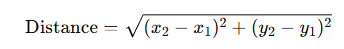

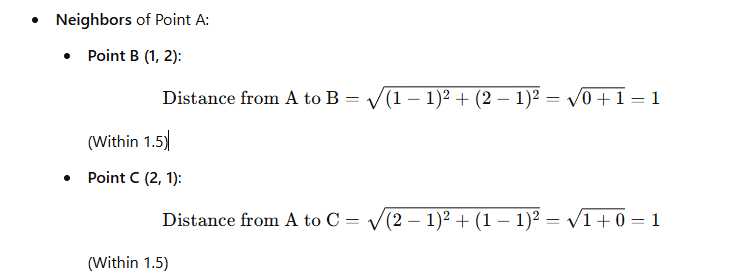

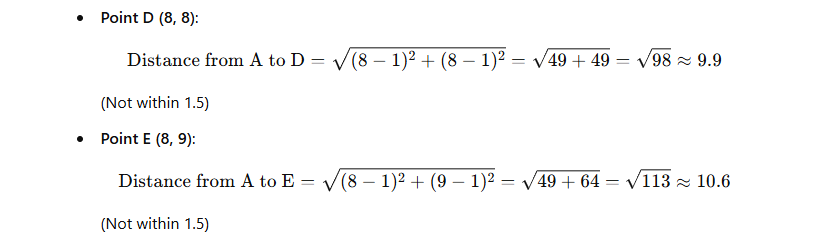

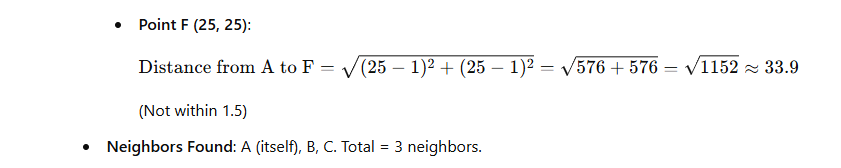

**4.Determine if A is a Core Point**:

Since Point A has 3 neighbors (including itself) and MinPts=3, it qualifies as a core point.

**5.Start a Cluster**:

Since A is a core point, we can start Cluster 1 with A and include its neighbors (B and C).

### <font color='magenta'>   </font>

**Final Result**:

*Cluster 1*: A, B, C (these points are close together).

*Noise Points*: D, E, F (too far from any cluster).

### <font color='magenta'>   </font>

**Visualization**:

Imagine a scatter plot:

Cluster points (A, B, C) are close together and form a group.

Points D, E, and F are isolated and do not form any clusters.

### <font color='magenta'>    </font>

**Summary**:

DBSCAN finds clusters based on how many points are nearby (density).

It creates clusters of dense areas and marks isolated points as noise.

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

# <font color='red'>Model building    </font>

- I will generate random data and i will build this model.

#### <font color='magenta'> Generate Sample Data   </font>

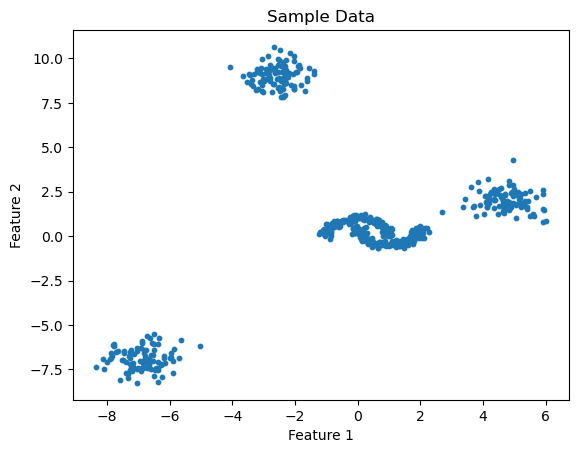

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

# Generate sample data
n_samples = 300
X_moons, _ = make_moons(n_samples=n_samples, noise=0.1, random_state=42)
X_blobs, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=42)

# Combine datasets
X = np.vstack((X_moons, X_blobs))

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### <font color='magenta'>     </font>

#### <font color='magenta'> Fit DBSCAN Model   </font>

In [5]:
from sklearn.cluster import DBSCAN

# Set DBSCAN parameters
epsilon = 0.2  # Distance threshold
min_samples = 5  # Minimum points to form a cluster

# Fit the model
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

# Print cluster labels
print("Cluster labels:", np.unique(clusters))

Cluster labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11]


### <font color='magenta'>   </font>

#### <font color='magenta'> Visualize the Results   </font>

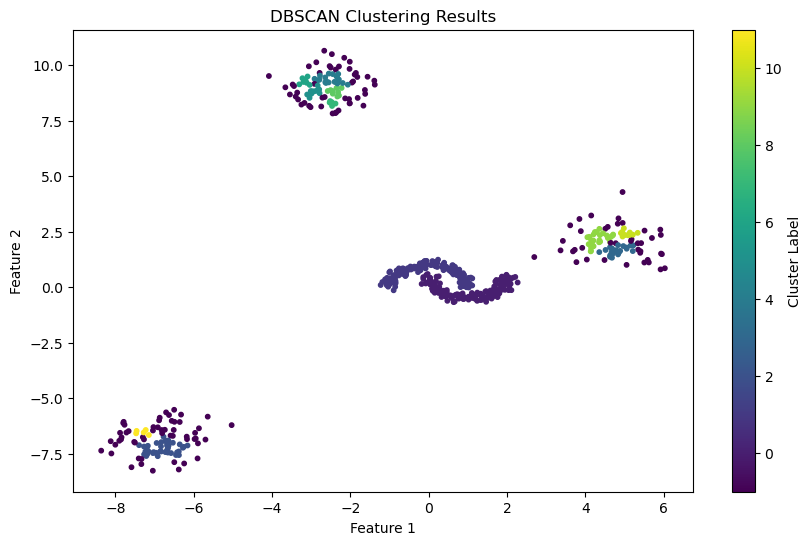

In [6]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=10, cmap='viridis')
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()

### <font color='magenta'>  </font>

### <font color='magenta'>    </font>

### <font color='magenta'>    </font>

# <font color='red'>END.     </font>